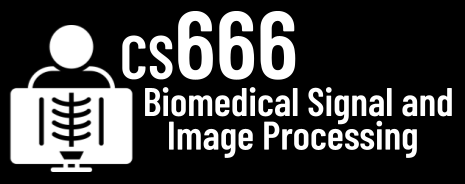

# Assignment 1

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (10pts): Install the BioSPPY library with the following code.

In [2]:
!pip install biosppy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 3.8 MB/s eta 0:00:00


**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [5]:
from biosppy import storage
signal, metadata = storage.load_txt('ecg.txt')

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [6]:
num_samples = signal.shape[0]


In [7]:
num_samples

15000

In [9]:
SAMPLING_RATE = 1000
SECONDS = num_samples / SAMPLING_RATE

15.0

**Task 4** (20 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

In [13]:
### TODO
from biosppy.signals import ecg
import matplotlib.pyplot as plt


# Process the ECG signal
ecgOut = ecg.ecg(signal=signal, sampling_rate=1000., show=False)

# Extract the QRS complex locations
qrs_locs = ecgOut['rpeaks']

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

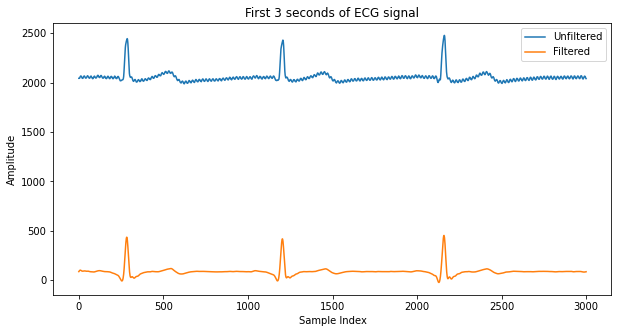

In [17]:
num_samples = int(3 * metadata['sampling_rate'])

# Plot the first 3 seconds of the unfiltered and filtered signals
plt.figure(figsize=(10, 5))
plt.plot(signal[:num_samples], label='Unfiltered')
plt.plot(ecgOut['filtered'][:num_samples], label='Filtered')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('First 3 seconds of ECG signal')
plt.legend()
plt.show()

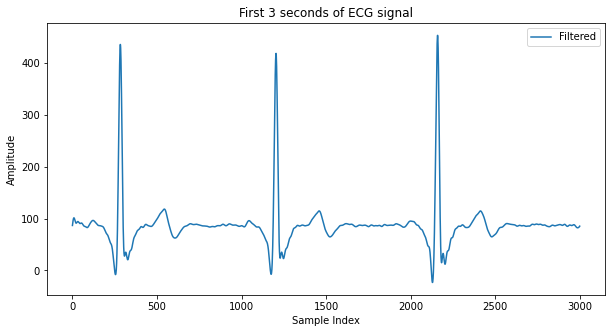

In [18]:
### TODO plot filtered signal

# Plot the first 3 seconds of the unfiltered and filtered signals
plt.figure(figsize=(10, 5))
# plt.plot(signal[:num_samples], label='Unfiltered')
plt.plot(ecgOut['filtered'][:num_samples], label='Filtered')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('First 3 seconds of ECG signal')
plt.legend()
plt.show()

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

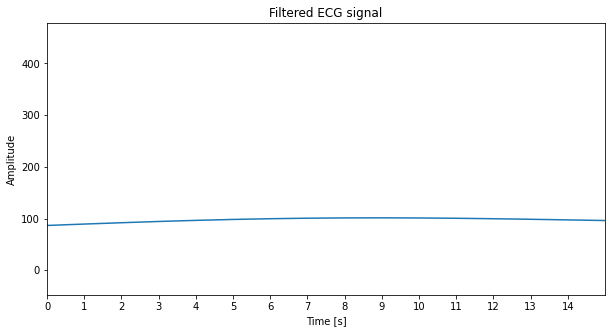

In [20]:
### TODO
import numpy as np
# Plot the filtered ECG signal
plt.figure(figsize=(10, 5))
plt.plot(ecgOut['filtered'], label='Filtered')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Filtered ECG signal')

# Mark the R-peaks with vertical lines
for loc in qrs_locs:
    plt.axvline(x=loc, color='red', ls=':')

# Convert the sample index to time in seconds
time = np.linspace(0, len(signal) / metadata['sampling_rate'], len(signal))
plt.xlim([0, time[-1]])
plt.xticks(np.arange(0, time[-1], 1))
plt.xlabel('Time [s]')

plt.show()

**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [21]:
!pip install neurokit2
import neurokit2 as nk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.9 MB/s eta 0:00:00


**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

In [36]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method
import neurokit2 as nk
rpeaks = ecgOut['rpeaks']

# Delineate the ECG signal
delineation = nk.ecg_delineate(signal, sampling_rate=metadata['sampling_rate'], rpeaks=rpeaks)

P_peaks = delineation[0]
P_onsets = delineation[1]
P_offsets = delineation[2]
Q_peaks = delineation[3]
R_onsets = delineation["ECG_R_Onsets"]
R_offsets = delineation["ECG_R_Offsets"]
S_peaks = delineation["ECG_S_Peaks"]
T_peaks = delineation["ECG_T_Peaks"]
T_onsets = delineation["ECG_T_Onsets"]
T_offsets = delineation["ECG_T_Offsets"]

delineation


IndexError: ignored

In [ ]:
# TODO Does the detection work well?

**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

In [ ]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal

In [ ]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

In [ ]:
# Finally, run the delineation on the filtered signal from BioSPPY.

In [ ]:
# TODO Which one works the best?

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#